![pandas](https://drive.google.com/uc?export=view&id=1ViV-ei7OIK8I4CYXofrPcaONDPHYun4i)

# Pandas

Pandas is an open source Python package that is most widely used for data science/data analysis and machine learning tasks.

- It is like dplyr/tidyverse in R (but in Python, of course)

- It is built on top of another package named Numpy, which provides support for multi-dimensional arrays.

What can Pandas do

- Data cleaning
- Data fill
- Data normalization
- Merges and joins
- Data visualization
- Statistical analysis
- Data inspection
- Loading and saving data


Why we need Pandas

1. Call texts into a dataframe
2. Analyze the texts in the dataframe using spaCy
3. Append output from spaCy into the dataframe for easy analysis

Can then use

- Matplotlib for visualizing data
- Pandas or Numpy for stats
- Export .csv file for use in R, JASP, SPSS, etc...

What we will cover here

1. how to import data into a pandas DataFrame
2. how to explore data stored in a pandas DataFrame
3. how to append data to a pandas DataFrame
4. how to save the data in a pandas DataFrame

## Reading in text data

There are two choices generally

    1. Read in a .csv with associated text data
    2. Read in .txt files

We are going to work with 1 mostly
  - but we will also learn 2.


### Class dataset 1: Reading data

From

Crossley, S. A., Skalicky, S., & Dascalu, M. (2019). Moving beyond classic readability formulas: New methods and new models. Journal of Research in Reading, 42 (3-4), 541-561.

**Data**

Introduction sections from Wikipedia and Simple Wikipedia

    - 300 texts from each site
    - Science, technology, history
    - Approximately 200 words long

Amazon.com Mechanical Turk (crowdsourcing service)

    - Turk Prime (3rd party website)
    - Blocks duplicate / previous workers
    - Manage experiment creation / deployment

Participants

    - 855 valid participants
      - 8605 pairwise comparisons

**The Task**

![the_task](https://drive.google.com/uc?export=view&id=14EKO3Jf5peWh2YVm0FVUv-L95RhvgFwp)

**Readability Criteria**

Pairwise scoring (Bradley-Terry model) to develop reading criteria

  - Describe the probabilities of the possible outcomes when individuals are judged against one another in pairs
  - Inferring rankings over elements of a set of objects
  - Obtain a set of gold-standard labels for readability and comprehension


**Final Data**

Removed 9 texts (outliers)

591 texts with unique readability criteria for each text
  - bt_readability


### Giving Colab access to your data

Colab needs to be given permission to access files/folders in your google drive before you can read in files.


In [1]:
# Load the Drive helper
from google.colab import drive

# Below will prompt for authorization but it will make your google drive available (i.e., mount your drive).
drive.mount("/content/drive")

Mounted at /content/drive


This will pop up

![google](https://drive.google.com/uc?export=view&id=1oRrekzyKfg0fYinvBbOdFVPl_DZcuuZV)


Select "Connect to Google Drive"

If you have more than one google account, it will ask which account you want to connect with. It will then ask permission to access drive.

In [2]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive".

!ls "/content/drive/My Drive" #(ls is list directory)

'April 15th Update.gslides'
 archive
'Colab Notebooks'
'CS5891 Course Project Initial Proposal.gdoc'
'CS5891 final presentation _Yan Zhang, Kun Peng, Jules Zou.gslides'
'CS5891-final report.gdoc'
'CS5891 mid status presentation _Yan Zhang, Kun Peng, Jules Zou.gslides'
'CS5891 paper presentation.gslides'
'CS5891 project proposal.gslides'
 CS8395-08.gdoc
 dataset
'from __future__ import absolute_import'$'\n''from __future__ import division'$'\n''from __future__ import print_function'$'\n\n''import _init_p~01'\'')'$'\n''        numers = [1, 1, 3, 5, 35]'$'\n''        denoms = [1, 6, 40, 112, 1152]'$'\n''        ans = fractions.Fraction('\''0'\'')'$'\n''        .gdoc'
'Kun Peng'
'Kun Peng-CS8395-hw1 discussion session.gdoc'
 main.py
'Outline for Final paper.gdoc'
'Paper Outline.gdoc'
'PengKun182024TaxDocs (1).gdoc'
 PengKun182024TaxDocs.gdoc
 PengKun182024TaxDocs.pdf
 PengKun932023TaxDocs.pdf
'Project proposal.gdoc'
 renate_config.py
 results
'Screen Recording 2023-11-15 at 11.29.13 AM.mov

In [4]:
#find out where you are and move to correct location
import os #package for figuring out operating system

os.getcwd() #what is the current working directory

os.listdir() #what is in currrent working directory

os.chdir("/content/drive/MyDrive/Colab Notebooks/DS_5780_spring_25") #change directory

os.listdir() #data is there

['reading_600_texts_metadata_only.csv',
 'reading_600_texts.csv',
 'all_excerpts',
 '__MACOSX',
 '.ipynb_checkpoints',
 'reading_data_surface_level_features.csv']

### Let's talk about text...

So far, we have only looked at single texts that we input as variables.

Python natively allows you to read in files and analyze them.

    - Single texts
    - Batches of texts
    
For this class, we are going to use Pandas to control much of our data analysis pipeline.
- we will not rely on reading and writing using base Python functions.

#### Types of Text

**Rich Text (BAD)**

Word processors, such as Microsoft Word, produce rich text
  - text whose appearance has been formatted or styled in a specific way.

Rich text allows defining specific visual styles for document elements.
   - Headers, for example, may use a different font than the body text
   - Body may feature italic or bold fonts for emphasis
   - Rich text can also include various types of images, tables and other document elements.

**Plain Text (GOOD)**

- Unlike rich text, plain text does not contain any information about the visual appearance of text, but consists of characters only.

- Characters, in this context, refers to letters, numbers, punctuation marks, spaces and line breaks.

- Plain text lacks any formatting or style information.

- Plain text is easy for computers to read.

***Types of Plain Text***

*ASCII*

- American Standard Code for Information Interchange (ASCII) is a foundation for many modern character encoding systems.

- ASCII is still widely used, but is very limited in terms of its character range.
  - If your language happens to include characters such as ä or ö, ASCII will not cover them.

*UNICODE*

- Unicode is a standard for encoding text in most writing systems used across the world
  - covering nearly 140 000 characters in modern and historic scripts, symbols and emoji.

- For example, the pizza slice emoji 🍕 has the Unicode “code” U+1F355
  - the corresponding code for a whitespace is U+0020.

- Unicode can be implemented by different character encodings, such as UTF-8, which is defined by the Unicode standard.

- UTF-8 is backwards compatible with ASCII.
  - the ASCII character encodings form a subset of UTF-8, which makes life in the NLP world much easier.

- UTF-8 is our friend.

### Reading in .csv File in Pandas

This will be the most common approach to reading in data.
  - We will also read in .txt files later.

Let's look over the .csv file
    
    - reading_600_texts.csv
    - All the texts and included metadata
      - Text ID
      - bt_readability
      - Source
      - Topic
      - Type
      - Domain

In [5]:
# import pandas (it's a package)

# pandas is commonly abbreviated pd, which lets you just call pd and not pandas later (as we shall see)

import pandas as pd

# read in the .csv file

# reading_data = pd.read_csv('reading_600_texts.csv', encoding = "utf-8") #this will not work because we
# have some characters somewhere in the text that are not utf-8..

reading_data = pd.read_csv('reading_600_texts.csv', encoding = "ISO-8859-1")

# UTF-8 is a multibyte encoding that can represent any Unicode character in Western European languages
# ISO 8859-1 is a single-byte encoding that can represent the first 256 Unicode characters. Both encode
# ASCII exactly the same way. This encoding is used to force non-UTF-8 text into
# text (which may not always be the best, but...)


#### Check out the data

In [6]:
#what is it?

print(type(reading_data))

#this will show the pandas dataframe

reading_data

<class 'pandas.core.frame.DataFrame'>


,id,text,bt_readability,Source,Topic,Text type,Domain,
0,1,The Solar System is the Sun and all the object...,0.022084,https://simple.wikipedia.org/wiki/Solar_System,solar system,Simple,Science,NaN
1,2,An atom is the basic unit that makes up all ma...,0.117281,https://simple.wikipedia.org/wiki/Atom,atom,Simple,Science,NaN
2,3,An ion is an electrically charged atom or grou...,0.170116,https://simple.wikipedia.org/wiki/Ion,ion,Simple,Science,NaN
3,4,Plasma is a state of matter. The three other c...,0.393468,https://simple.wikipedia.org/wiki/Plasma_(phys...,plasma,Simple,Science,NaN
4,5,The South Pole is the most southern point on t...,0.007675,https://simple.wikipedia.org/wiki/South_Pole,South Pole,Simple,Science,NaN
...,...,...,...,...,...,...,...,...
586,596,Historiography is the study of the methodology...,0.181519,https://en.wikipedia.org/wiki/Historiography,Historiography,Regular,History,NaN
587,597,Post-classical history (also called the Post-A...,0.240442,https://en.wikipedia.org/wiki/Post-classical_h...,post-classical history,Regular,History,NaN
588,598,Oracle bone script (Chinese: ç²éª¨æ) was th...,0.814657,https://en.wikipedia.org/wiki/Oracle_bone_script,oracle bone script,Regular,History,NaN
589,599,A water clock or clepsydra (Greek ÎºÎ»ÎµÏÏÎ´...,0.054526,https://en.wikipedia.org/wiki/Water_clock,water clock,Regular,History,NaN


In [7]:
#check out the data.

#.head gives you the first rows
reading_data.head(1)

,id,text,bt_readability,Source,Topic,Text type,Domain,
0,1,The Solar System is the Sun and all the object...,0.022084,https://simple.wikipedia.org/wiki/Solar_System,solar system,Simple,Science,NaN


In [8]:
#get dimensions

reading_data.shape #not a method, so no need for parenthesis
#(it's an attribute, nothing needs to be calculated or stored because it already is)

(591, 8)

In [9]:
#learn about variables in dataframe

reading_data.info() #give all the data types. is a method, so uses parentheses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              591 non-null    int64  
 1   text            591 non-null    object 
 2   bt_readability  591 non-null    float64
 3   Source          588 non-null    object 
 4   Topic           591 non-null    object 
 5   Text type       591 non-null    object 
 6   Domain          591 non-null    object 
 7                   0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 37.1+ KB


In [10]:
#print row and column (in this case, row 3 and column 2)
print(reading_data.iloc[2, 1])
# .iloc helps you to locate information in that table using its numerical position

An ion is an electrically charged atom or group of atoms. It is a part of an atom, or part of a group of atoms (molecule). It is "charged" so it will move near electricity. This is because atoms are made of three smaller parts (1) neutrons (with no charge), and equal numbers of (2) charged protons and (3) oppositely-charged electrons. An ion has unequal numbers of protons and electrons. Making an ion from an atom or molecule is called ionization.
The charge on a proton is measured as +1 (positively charged), and the charge on an electron is measured as -1 (negatively charged). An atom that is ionized makes two ions, one positive, and one negatively charged. For example, a neutral hydrogen atom has one proton and one electron. Heating the atom breaks it into two parts (1) a positively charged hydrogen ion, H+ (2) a negatively charged electron.


In [11]:
#Get column names

reading_data.columns

Index(['id', 'text', 'bt_readability', 'Source', 'Topic', 'Text type',
       'Domain', ' '],
      dtype='object')

In [12]:
# get column information

reading_data["text"]

,text
0,The Solar System is the Sun and all the object...
1,An atom is the basic unit that makes up all ma...
2,An ion is an electrically charged atom or grou...
3,Plasma is a state of matter. The three other c...
4,The South Pole is the most southern point on t...
...,...
586,Historiography is the study of the methodology...
587,Post-classical history (also called the Post-A...
588,Oracle bone script (Chinese: ç²éª¨æ) was th...
589,A water clock or clepsydra (Greek ÎºÎ»ÎµÏÏÎ´...


In [13]:
# get counts by variable type in a series

reading_data["Domain"].value_counts()



,count
Domain,
History,199
Science,197
Technology,195


In [14]:
# Get basic descriptives for our readability score

reading_data['bt_readability'].describe()

,bt_readability
count,591.000000
mean,0.147235
std,0.154078
min,0.005002
25%,0.046115
50%,0.096642
75%,0.181258
max,0.947951


### Importing data from .txt files

Not all data is easily available in .csv files...

    - Often need to read in .txt files

In [15]:
# First, find the files you want

# Import the path library
from pathlib import Path

# Create a Path object that points to the directory with data
reading_dir = Path('all_excerpts')

# Get all .txt files in the directory
reading_files = list(reading_dir.glob('*.txt'))
# glob is a pattern-matching function that searches for files based on the
# pattern you provide

# Check the files
print(reading_files[0:10])

[PosixPath('all_excerpts/102.txt'), PosixPath('all_excerpts/100.txt'), PosixPath('all_excerpts/110.txt'), PosixPath('all_excerpts/106.txt'), PosixPath('all_excerpts/111.txt'), PosixPath('all_excerpts/11.txt'), PosixPath('all_excerpts/1.txt'), PosixPath('all_excerpts/101.txt'), PosixPath('all_excerpts/104.txt'), PosixPath('all_excerpts/114.txt')]


In [16]:
# Create a DataFrame and assign the result to the variable 'reading_data_2'
# This is an empty dataframe

reading_data_2 = pd.DataFrame(index=range(0, len(reading_files)), columns=['filename', 'text'])
# index starts at 0. range will be 591 eventually because there are 591 files
# create two columns

# Call the variable to inspect the output
reading_data_2

,filename,text
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
586,NaN,NaN
587,NaN,NaN
588,NaN,NaN
589,NaN,NaN


In [17]:
# APPROACH 1

# Loop over the corpus files and count each loop using enumerate()
for i, f in enumerate(reading_files):
# enumerate adds a counter to an interable
# i will hold the current index (starting at 0)
# f will hold the current path object

    # Read the file contents and encode in utf-8
    text = f.read_text(encoding='utf-8')

    # Get the filename from the Path object
    filename = f.name

    # Assign the text from the file to index 'i' at column 'text'
    # using the .at accessor – note that this modifies the DataFrame
    # "in place" – you don't need to assign the result into a variable
    reading_data_2.at[i, 'text'] = text

    # We then do the same to the filename
    reading_data_2.at[i, 'filename'] = filename

In [18]:
# Is the dataframe correct?

reading_data_2

,filename,text
0,102.txt,Voice over Internet protocol (or VoIP) is a te...
1,100.txt,An interface is what the user uses on an opera...
2,110.txt,Random access memory (or simply RAM) is the me...
3,106.txt,"A television (also TV, telly or tube) is a mac..."
4,111.txt,Radar is a machine that uses radio waves for e...
...,...,...
586,85.txt,Many animals develop in separate stages. A lar...
587,75.txt,Dormancy is a period in an organism's life cyc...
588,96.txt,A personal computer (PC) is the common name fo...
589,84.txt,Plankton are drifting organisms that live in t...


In [19]:
# APPROACH 2

# Assigning elements to a dataframe can be slow, so it is usually preferable to assemble the data first,
# then perform the assignment once (for each column).
# Pandas will understand the Python list and make it a column as long as it is the correct length

filenames = []
texts = []
for f in reading_files:

    # Read the file contents
    text = f.read_text(encoding='utf-8')

    # Get the filename from the Path object
    filename = f.name

    filenames.append(filename)
    texts.append(text)

reading_data_2['text'] = texts
reading_data_2['filename'] = filenames

In [20]:
# Is the dataframe correct?

reading_data_2

,filename,text
0,102.txt,Voice over Internet protocol (or VoIP) is a te...
1,100.txt,An interface is what the user uses on an opera...
2,110.txt,Random access memory (or simply RAM) is the me...
3,106.txt,"A television (also TV, telly or tube) is a mac..."
4,111.txt,Radar is a machine that uses radio waves for e...
...,...,...
586,85.txt,Many animals develop in separate stages. A lar...
587,75.txt,Dormancy is a period in an organism's life cyc...
588,96.txt,A personal computer (PC) is the common name fo...
589,84.txt,Plankton are drifting organisms that live in t...


**What is Missing**

Meta-data...

This can be added in using Pandas (i.e., call in the file with the meta-data) and then merge the two dataframes together.



In [21]:
#call in meta data

#read in the .csv file

meta_data = pd.read_csv('reading_600_texts_metadata_only.csv', encoding = "ISO-8859-1")

print(meta_data.info())

meta_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   filename        591 non-null    int64  
 1   bt_readability  591 non-null    float64
 2   Source          588 non-null    object 
 3   Topic           591 non-null    object 
 4   Text type       591 non-null    object 
 5   Domain          591 non-null    object 
 6                   0 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 32.4+ KB
None


,filename,bt_readability,Source,Topic,Text type,Domain,
0,1,0.022084,https://simple.wikipedia.org/wiki/Solar_System,solar system,Simple,Science,NaN
1,2,0.117281,https://simple.wikipedia.org/wiki/Atom,atom,Simple,Science,NaN
2,3,0.170116,https://simple.wikipedia.org/wiki/Ion,ion,Simple,Science,NaN
3,4,0.393468,https://simple.wikipedia.org/wiki/Plasma_(phys...,plasma,Simple,Science,NaN
4,5,0.007675,https://simple.wikipedia.org/wiki/South_Pole,South Pole,Simple,Science,NaN
...,...,...,...,...,...,...,...
586,596,0.181519,https://en.wikipedia.org/wiki/Historiography,Historiography,Regular,History,NaN
587,597,0.240442,https://en.wikipedia.org/wiki/Post-classical_h...,post-classical history,Regular,History,NaN
588,598,0.814657,https://en.wikipedia.org/wiki/Oracle_bone_script,oracle bone script,Regular,History,NaN
589,599,0.054526,https://en.wikipedia.org/wiki/Water_clock,water clock,Regular,History,NaN


In [22]:
#need to have a column to merge the dataframe that matches. Currently, under filename
# in reading_data_2, all names end in .txt. this is not the case with meta_data

#remove .txt to merge two dataframes

reading_data_2['filename'] = reading_data_2['filename'].str.replace(r'.txt', '', regex=True)

print(reading_data_2.info()) #note that filename here is an object... in meta_data it is int64

reading_data_2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  591 non-null    object
 1   text      591 non-null    object
dtypes: object(2)
memory usage: 9.4+ KB
None


,filename,text
0,102,Voice over Internet protocol (or VoIP) is a te...
1,100,An interface is what the user uses on an opera...
2,110,Random access memory (or simply RAM) is the me...
3,106,"A television (also TV, telly or tube) is a mac..."
4,111,Radar is a machine that uses radio waves for e...
...,...,...
586,85,Many animals develop in separate stages. A lar...
587,75,Dormancy is a period in an organism's life cyc...
588,96,A personal computer (PC) is the common name fo...
589,84,Plankton are drifting organisms that live in t...


In [23]:
#change filename in reading_data_2 to int64

reading_data_2['filename'] = reading_data_2['filename'].astype('int64')

print(reading_data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  591 non-null    int64 
 1   text      591 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.4+ KB
None


In [24]:
#merge the two data frames

reading_data_3 = pd.merge(reading_data_2, meta_data, on="filename")

In [25]:
#check dataframe

reading_data_3.shape

reading_data_3


,filename,text,bt_readability,Source,Topic,Text type,Domain,
0,102,Voice over Internet protocol (or VoIP) is a te...,0.092069,https://simple.wikipedia.org/wiki/Voice_over_I...,voice over interner protocol,Simple,Technology,NaN
1,100,An interface is what the user uses on an opera...,0.043814,https://simple.wikipedia.org/wiki/Interface,interface,Simple,Technology,NaN
2,110,Random access memory (or simply RAM) is the me...,0.084375,https://simple.wikipedia.org/wiki/Random-acces...,randon-access memory,Simple,Technology,NaN
3,106,"A television (also TV, telly or tube) is a mac...",0.029209,https://simple.wikipedia.org/wiki/Television,television,Simple,Technology,NaN
4,111,Radar is a machine that uses radio waves for e...,0.022204,https://simple.wikipedia.org/wiki/Radar,radar,Simple,Technology,NaN
...,...,...,...,...,...,...,...,...
586,85,Many animals develop in separate stages. A lar...,0.096508,https://simple.wikipedia.org/wiki/Larva,larva,Simple,Science,NaN
587,75,Dormancy is a period in an organism's life cyc...,0.101869,https://simple.wikipedia.org/wiki/Dormancy,dormancy,Simple,Science,NaN
588,96,A personal computer (PC) is the common name fo...,0.011358,https://simple.wikipedia.org/wiki/Personal_com...,personal computer,Simple,Technology,NaN
589,84,Plankton are drifting organisms that live in t...,0.109780,https://simple.wikipedia.org/wiki/Plankton,plankton,Simple,Science,NaN


### Using spaCy on a Pandas dataset

This is when it all comes together and the combintatorial power of Pandas and spaCy becomes obvious.

We will do the following

1. Count number of words by text (volume)
2. Count number of types by text (abundance)
3. Calculate Type-token ratio (TTR) by text

In [26]:
#Create a practice dataframe to work with small text first. This is usually wise to make sure your counts are accurate

# initialize list with practice sentence
prac_sent = ["That man saw himself in a mirror. The mirror in his mind.", "I had seen him in that car. It was long and sweet. What a beauty."]

# Create the pandas DataFrame with column name
prac_df = pd.DataFrame(prac_sent, columns=['text'])

# print dataframe.
prac_df


,text
0,That man saw himself in a mirror. The mirror i...
1,I had seen him in that car. It was long and sw...


In [27]:
#lower case the data in our df

prac_df['text'] = prac_df['text'].str.lower() #let's lower case everything in the text column of the Pandas dataframe

In [28]:
prac_df

,text
0,that man saw himself in a mirror. the mirror i...
1,i had seen him in that car. it was long and sw...


In [29]:
#call in spacy

import spacy
nlp = spacy.load("en_core_web_sm")


**Number of Words**

In [30]:
# When working with a list of texts (or a column of a Pandas dataframe), it is best to use nlp.pipe()
# This performs some batching to process the texts faster
# But, nlp.pipe() returns a generator, so we usually want to make that a list by wrapping it in list()
reading_data_docs = list(nlp.pipe(prac_df.text))

words_final = [] #this will become a list of lists that contains all the words found in each text. We will use it later for TTR

nw_final = [] #this is an empty list that will become a list of lists later

# Get words and word count

# Classic for loop approach
for tokenized_doc in reading_data_docs:
  words = []
  nw = 0
  for token in tokenized_doc: #for token in each doc
        #print(token.text, token.pos_, token.dep_)
        if not token.is_punct and not token.pos_ == "SPACE": #if the token is not punctuation, it must be a word.
        # There are also weird space counts at the paragraph level often, although this is not important here
            #print(token.text, token.pos_, token.dep_) #test that hypothesis
            nw += 1 #add 1 to nw count for each token that is not a punct
            words.append(token.text) #append tokens to word list
    #print(nw) #this will print by text
  nw_final.append(nw) #append number of words by text to list above (creating a list of lists)
  words_final.append(words)

# List comprehension approach
#for tokenized_doc in reading_data_docs:
   # words will be all the tokens in the current SpaCy document that are not whitespace or punctuation
#    words = [tok for tok in tokenized_doc if not tok.is_space and not tok.is_punct]
#    nw_final.append(len(words))
#    words_final.append(words)

print(nw_final[0:2]) #first two items in list
print(words_final[0]) #first list in list of lists

[12, 15]
['that', 'man', 'saw', 'himself', 'in', 'a', 'mirror', 'the', 'mirror', 'in', 'his', 'mind']


In [31]:
#now, for some pandas magic

prac_df['NW'] = nw_final #create a new column in pandas called NW and assign it the values from nw_final

prac_df

,text,NW
0,that man saw himself in a mirror. the mirror i...,12
1,i had seen him in that car. it was long and sw...,15


## Lexical Diversity

We have the number of words.

We need to calculate

**Abundance**

How many unique words are there in each text?

  - Use the set() function on words_final

**TTR**

We have the number of
  - Types
  - Tokens

All we have to do are

1. Divide the number of types by the number of tokens

And then use a list comprehension or for loops to calculate for each text

In [32]:
print(nw_final[0:2]) #first two texts
print(words_final[0:2])

[12, 15]
[['that', 'man', 'saw', 'himself', 'in', 'a', 'mirror', 'the', 'mirror', 'in', 'his', 'mind'], ['i', 'had', 'seen', 'him', 'in', 'that', 'car', 'it', 'was', 'long', 'and', 'sweet', 'what', 'a', 'beauty']]


In [33]:
abun_text = [len(set(sub_list)) for sub_list in words_final] #this is a list comprehension

print(abun_text[0:2])

[10, 15]


In [34]:
#list comprehension TTR

ttr_text = [len(set(sub_list)) / len(sub_list) for sub_list in words_final] #also a list comprehension

print(ttr_text[0:2])

[0.8333333333333334, 1.0]


In [35]:
prac_df["Abundance"] = abun_text

prac_df["TTR"] = ttr_text

prac_df

,text,NW,Abundance,TTR
0,that man saw himself in a mirror. the mirror i...,12,10,0.833333
1,i had seen him in that car. it was long and sw...,15,15,1.000000


**Loop Versus List Comprehension**

Can also use a for loop to do this, but it is much more complicated than a list comprehension

  - See below

In [36]:
#for loop
# THIS IS MUCH MORE COMPLICATED

tokens_list = []
types_list = []

for sub_list in words_final:
    types = []
    tokens = []
    tokens.append(len(sub_list))
    tokens_list.append(tokens)
    types.append(len(set(sub_list)))
    types_list.append(types)

print(tokens_list[0:2])
print(types_list[0:2])





[[12], [15]]
[[10], [15]]


In [37]:
#but now, you have two lists of lists, which you cannot divide. So, you have to flatten out the lists...

flat_types = []
for sublist in types_list: #for each sublist in the list
    for types in sublist: #for each item in the list
        flat_types.append(types) #append that item to a new list

flat_tokens = []
for sublist in tokens_list:
    for tokens in sublist:
        flat_tokens.append(tokens)

print(flat_types[0:2]) #a single list
print(flat_tokens[0:2]) #a single list

[10, 15]
[12, 15]


In [38]:
# now to divide two lists, which is also not easy...

ttr_text_2 = []
for item in range(len(flat_types)): #for item in the range of the length of the list of types (i.e., 3)
    ttr_text_2.append(flat_types[item] / flat_tokens[item]) #append TTR value to ttr_text_2

print(ttr_text_2[0:2])

[0.8333333333333334, 1.0]


### Saving a Pandas dataframe

It is super easy to export the dataframe into a .csv file


In [39]:
prac_df.to_csv('reading_data_surface_level_features.csv')

# This will be in your data folder

### Now we have a dataframe with linguistic information.

What are the next steps

Analyze the larger corpus of reading data (600 excerpts)

Develop an appropriate research questions related to the data.

Address research question visually and statistically using your analysis software of choice.

1. Pandas
2. R
3. SPSS or another similar software

# Research Question


*   How do readability scores vary across different domains (e.g., science, history, technology)?
*   Is there a significant difference in lexical diversity (TTR) between texts sourced from Wikipedia vs. Simple Wikipedia?
*   Can the type-token ratio predict readability scores effectively?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              591 non-null    int64  
 1   text            591 non-null    object 
 2   bt_readability  591 non-null    float64
 3   Source          588 non-null    object 
 4   Topic           591 non-null    object 
 5   Text type       591 non-null    object 
 6   Domain          591 non-null    object 
 7                   0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 37.1+ KB
None
               id  bt_readability     
count  591.000000      591.000000  0.0
mean   299.636210        0.147235  NaN
std    173.691509        0.154078  NaN
min      1.000000        0.005002  NaN
25%    149.500000        0.046115  NaN
50%    299.000000        0.096642  NaN
75%    450.500000        0.181258  NaN
max    600.000000        0.947951  NaN
Domain
History       199
Sc

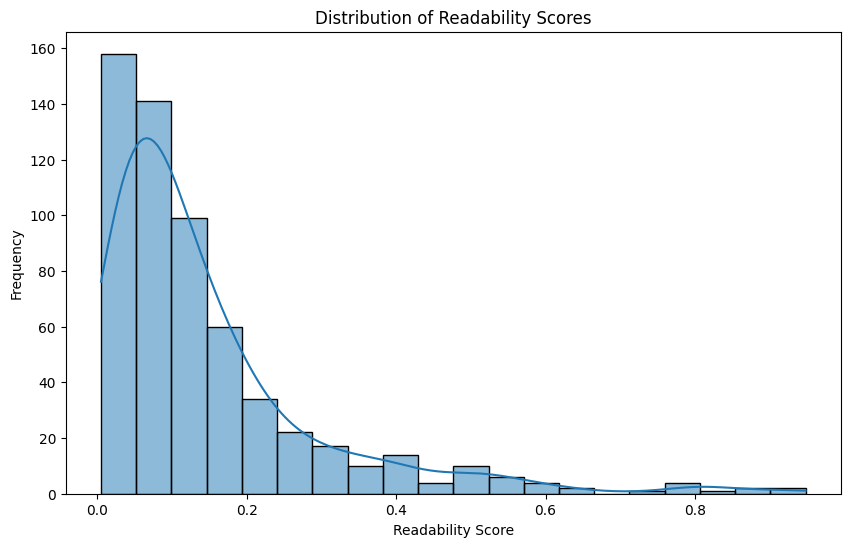

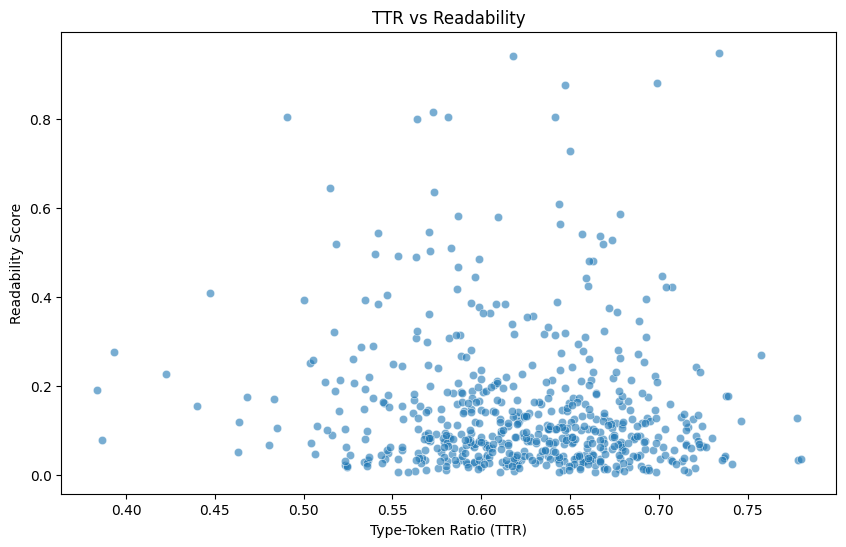

Domain: Science, Mean Readability: 0.18582633588832484
Domain: Technology, Mean Readability: 0.15758771384615383
Domain: History, Mean Readability: 0.0988882837688442
T-Test Results between Science and History: t-stat=6.266806719937112, p-value=9.674077114801282e-10
Correlation between TTR and Readability: -0.10678976514483819, p-value=0.00937553013068538


In [41]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr
import spacy

# Load data
data = pd.read_csv('reading_600_texts.csv', encoding="ISO-8859-1")

# Data exploration
print(data.info())
print(data.describe())
print(data['Domain'].value_counts())  # Check categories in the Domain column

# Visualization: Distribution of Readability Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['bt_readability'], bins=20, kde=True)
plt.title('Distribution of Readability Scores')
plt.xlabel('Readability Score')
plt.ylabel('Frequency')
plt.show()

# Text metrics calculations
nlp = spacy.load("en_core_web_sm")

# Function to calculate TTR
def calculate_metrics(texts):
    metrics = []
    for doc in nlp.pipe(texts, batch_size=50):
        tokens = [token.text for token in doc if not token.is_punct and not token.is_space]
        types = set(tokens)
        metrics.append({
            'Word Count': len(tokens),
            'TTR': len(types) / len(tokens) if len(tokens) > 0 else 0
        })
    return pd.DataFrame(metrics)

# Apply to text column
metrics_df = calculate_metrics(data['text'])

# Add calculated metrics to the main DataFrame
data = pd.concat([data, metrics_df], axis=1)

# Visualization: TTR vs Readability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TTR', y='bt_readability', data=data, alpha=0.6)
plt.title('TTR vs Readability')
plt.xlabel('Type-Token Ratio (TTR)')
plt.ylabel('Readability Score')
plt.show()

# Statistical Analysis
# Example: Comparing readability scores across domains
domains = data['Domain'].unique()
for domain in domains:
    print(f"Domain: {domain}, Mean Readability: {data[data['Domain'] == domain]['bt_readability'].mean()}")

# Example: T-test between two domains
domain1 = data[data['Domain'] == 'Science']['bt_readability']
domain2 = data[data['Domain'] == 'History']['bt_readability']
t_stat, p_value = ttest_ind(domain1, domain2, nan_policy='omit')
print(f"T-Test Results between Science and History: t-stat={t_stat}, p-value={p_value}")

# Correlation analysis
correlation, p_value_corr = pearsonr(data['TTR'], data['bt_readability'])
print(f"Correlation between TTR and Readability: {correlation}, p-value={p_value_corr}")

# Save processed data for further use
data.to_csv('processed_reading_data.csv', index=False)


### **Conclusion**

#### **1. Readability Differences Across Domains**
- **Science texts** have the highest mean readability score (**0.186**), followed by **Technology texts** (**0.158**), with **History texts** having the lowest readability score (**0.099**).
- A t-test between Science and History reveals a statistically significant difference in readability scores (t-statistic = 6.27, p-value ≈ 0), indicating that Science texts are perceived as more readable than History texts.
- These findings suggest that the subject matter and writing style of Science texts might be more accessible compared to History, which might use denser or more complex language.



#### **2. Weak Correlation Between Lexical Diversity (TTR) and Readability**
- There is a weak negative correlation between TTR and readability (correlation coefficient = -0.107, p-value = 0.009).
- This implies that texts with higher lexical diversity (more unique words relative to total words) tend to have slightly lower readability scores. However, the effect size is small, indicating other factors likely play a more significant role in determining readability.


#### **3. Statistical Significance of Findings**
- The t-test and correlation results are statistically significant, meaning the observed differences and relationships are unlikely to be due to random chance.
- An ANOVA comparing readability scores across all three domains would likely confirm that domain plays a significant role in readability perceptions.
